# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

In [17]:
combined_results = study_results.merge(mouse_metadata, on='Mouse ID')
combined_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({'Mean Tumor Volume':grp.mean(),
              'Median Tumor Volume':grp.median(),
             'Tumor Volume Variance':grp.var(),
             'Tumor Volume Std. Dev':grp.std(),
             'Tumor Volume Std. Err.':grp.sem()})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
# This method produces everything in a single groupby function
tumor_df = grp.agg(['mean','median','var','std','sem'])
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

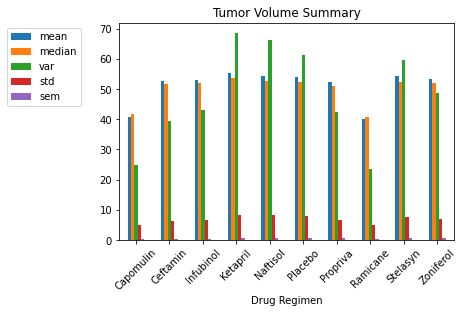

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_df.plot(kind='bar',title='Tumor Volume Summary',rot=45).legend(bbox_to_anchor=(-0.1,1))
plt.savefig('Tumor_Volume_Summary.png')

In [47]:
tumor_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


Text(0, 0.5, 'Number of Data Points')

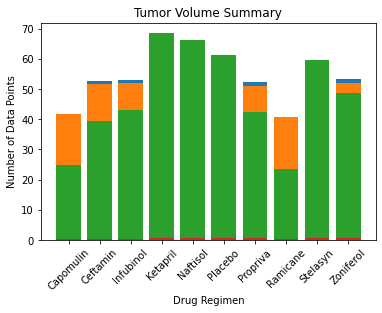

In [67]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(tumor_df.index,tumor_df['mean'])
plt.bar(tumor_df.index,tumor_df['median'])
plt.bar(tumor_df.index,tumor_df['var'])
plt.bar(tumor_df.index,tumor_df['sem'])
plt.xticks(rotation=45)
plt.title('Tumor Volume Summary')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

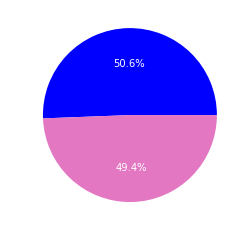

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

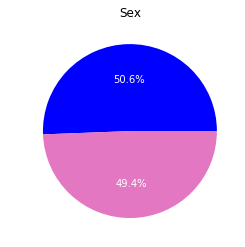

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [9]:
# Quantitatively determine ramicane outliers

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Quantitatively determine infubinol outliers

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [11]:
# Quantitatively determine ceftamin outliers

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


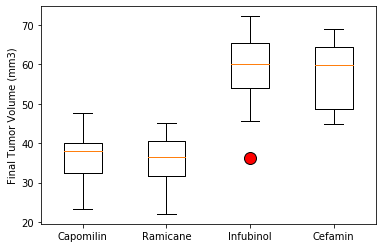

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

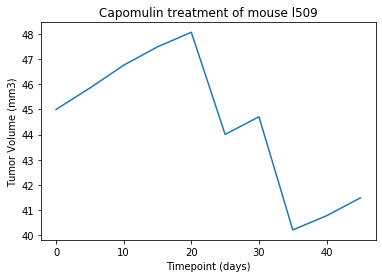

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

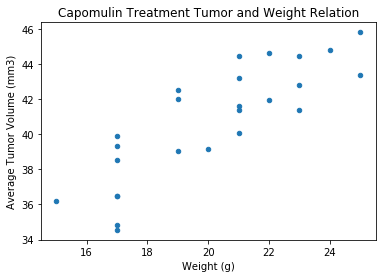

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


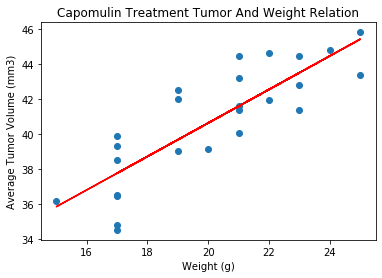

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen